# Practicing Dynare

This notebook replicates the examples in *Practicing Dynare* by Barillas, Bhandari, Colacito, Kitao, Matthes, Sargent, and Shin. 

In [1]:
addpath('C:\dynare\4.5.7\matlab')
base_path = 'C:\Users\barry\Documents\Academics\Quantecon-Notes';
cd 'C:\Users\barry\Documents\Academics\Quantecon-Notes\Dynare_model'

## Permanent Income Model

Hall (1988)

### Model

A consumer faces the following problem
$$
\max_{c_t, k_t} -\frac{1}{2} \sum_{t=0}^\infty \beta^t (c_t -b_t)^2
$$
subject to 
$$
c_t + k_t = Rk_{t-1} +d_t
$$
$$
d_t = \rho d_{t-1} + (1-\rho)\mu_d + \epsilon_d
$$
$$
b_t = \rho_b b_{t-1} + (1-\rho_b)\mu_b + \epsilon_b
$$
Assume $\beta R = 1$ and no depreciation, which leads to $i_t = k_t -k_{t-1}$
The Euler equation requires $\mu_{ct} = \mu_{ct+1}, \mu_{c_t} = b_t - c_t$ where $\mu_{ct}$ is the marginal utility of consumption or Lagrange multiplier

In [8]:
%%file Dynare_model\permanent_income\permanent_income.mod

periods = 1000;
var c k mu_c b d ian;
varexo e_d e_b;

parameters R rho rho_b mu_b mu_d;
R = 1.05;

rho = 0;
mu_b = 30;
mu_d = 5;
rho_b = 0;

model(linear);
c+k = R*k(-1) + d;
mu_c = b-c;
mu_c = mu_c(+1);
d = rho*d(-1)+mu_d*(1-rho)+e_d;
b = (1-rho_b)*mu_b + rho_b*b(-1)+e_b;
in = k - k(-1);
end;

initval;
d= mu_d;
k= 100;
c = (R-1)*k+d;
mu_c = mu_b-c;
b = mu_b;
end;

shocks;
var e_d;
stderr 1;
var e_b;
stderr 1;
end;

steady;

stoch_simul(dr_algo = 0, order = 1, periods = 1000, irf = 10);



Created file 'C:\Users\barry\Documents\Academics\Quantecon-Notes\Dynare_model\permanent_income\permanent_income.mod'.


In [9]:
cd 'C:\Users\barry\Documents\Academics\Quantecon-Notes\Dynare_model'
cd 'permanent_income'


Configuring Dynare ...
[mex] Generalized QZ.
[mex] Sylvester equation solution.
[mex] Kronecker products.
[mex] Sparse kronecker products.
[mex] Local state space iteration (second order).
[mex] Bytecode evaluation.
[mex] k-order perturbation solver.
[mex] k-order solution simulation.
[mex] Quasi Monte-Carlo sequence (Sobol).
[mex] Markov Switching SBVAR.

Using 64-bit preprocessor
Starting Dynare (version 4.5.7).
Starting preprocessing of the model file ...
Found 6 equation(s).
Evaluating expressions...done
Computing static model derivatives:
 - order 1
Computing dynamic model derivatives:
 - order 1
 - order 2
Processing outputs ...
done
Preprocessing completed.


STEADY-STATE RESULTS:

c    		 10
k    		 100
mu_c 		 20
b    		 30
d    		 5
in   		 0

MODEL SUMMARY

  Number of variables:         6
  Number of stochastic shocks: 2
  Number of state variables:   3
  Number of jumpers:           1
  Number of static variables:  2


MATRIX OF COVARIANCE OF EXOGENOUS SHOCKS
Variables   

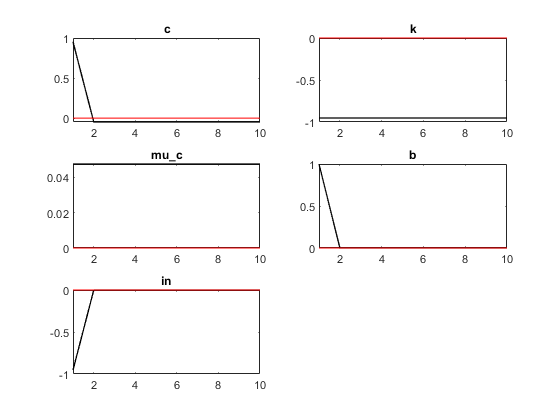

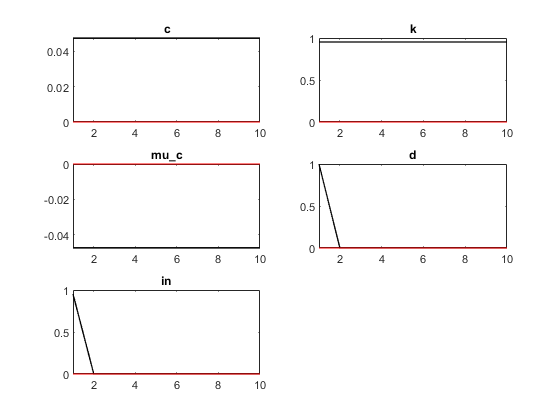

In [10]:
dynare permanent_income.mod

## Labor market for engineers

Ryoo and Rosen (2004)

### Model
Number of engineers: $N_t$. Number of new enterants into engineering school $s_t$. Wage level $w_t$. It takes $k$ periods of schooling to become an engineer. 

The present value of the engineer is 
$$
P_t = (1-\delta)\beta P_{t+1} + (1-\delta)^k \beta^k w_{t+k}
$$
The supply of new engineering students 
$$
s_t = a_0 + a_1 P_t + \epsilon_t
$$
A time-to-build structure of education process
$$
N_t = (1-\delta)N_{t-1} + s_{t-k}
$$
A demand curve for engineers 
$$
N_t = d_0 - d_1 w_t + e_{dt}
$$

In [15]:
%%file Dynare_model\engineer_market\engineer_market.mod

periods 500;
var s N P W;
varexo e_s e_d;
parameters a0 a1 delta d0 d1 bet k;
a0=10;
a1=1;
d0=1000;
d1=1;
bet=.99;
delta=.02;
model(linear);
s=a0+a1*P+e_s; // flow supply of new entrants
N=(1-delta)*N(-1) + s(-4); // evolution of the stock
N=d0-d1*W+e_d; // stock demand equation
P=bet*(1-delta)*P(+1)+bet^4*(1-delta)^4*W(+4); // present value of
//wages

end;
initval;
s=0;
N=0;
P=0;
W=0;
end;
shocks;
var e_d;
stderr 1;
var e_s;
stderr 1;
end;
steady;
check;
stoch_simul(dr_algo=0, order=1, periods=500, irf=10);

Created file 'C:\Users\barry\Documents\Academics\Quantecon-Notes\Dynare_model\engineer_market\engineer_market.mod'.


In [16]:
cd 'C:\Users\barry\Documents\Academics\Quantecon-Notes\Dynare_model'
cd 'engineer_market'


Configuring Dynare ...
[mex] Generalized QZ.
[mex] Sylvester equation solution.
[mex] Kronecker products.
[mex] Sparse kronecker products.
[mex] Local state space iteration (second order).
[mex] Bytecode evaluation.
[mex] k-order perturbation solver.
[mex] k-order solution simulation.
[mex] Quasi Monte-Carlo sequence (Sobol).
[mex] Markov Switching SBVAR.

Using 64-bit preprocessor
Starting Dynare (version 4.5.7).
Starting preprocessing of the model file ...
Substitution of endo leads >= 2: added 3 auxiliary variables and equations.
Substitution of endo lags >= 2: added 3 auxiliary variables and equations.
Found 10 equation(s).
Evaluating expressions...done
Computing static model derivatives:
 - order 1
Computing dynamic model derivatives:
 - order 1
 - order 2
Processing outputs ...
done
Preprocessing completed.


STEADY-STATE RESULTS:

s                		 19.9933
N                		 999.664
P                		 9.99328
W                		 0.336108

EIGENVALUES:
         Modulus      

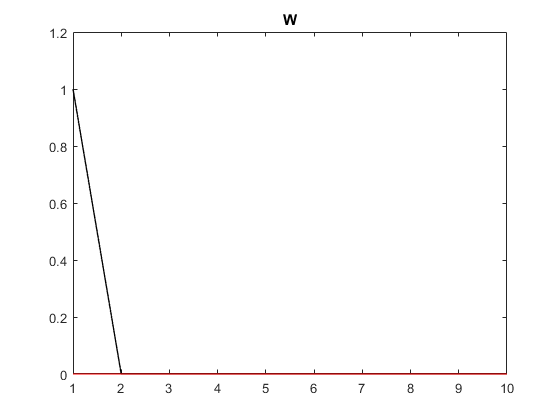

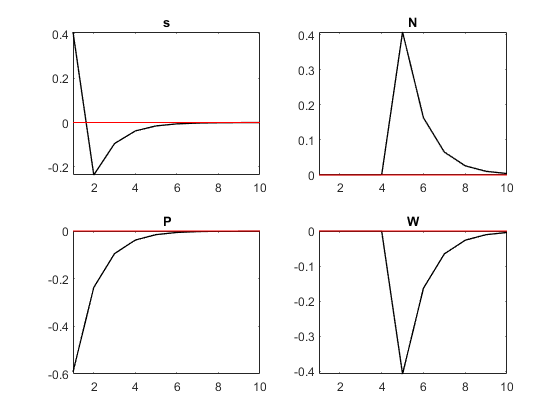

In [17]:
dynare engineer_market.mod